# Wilt Chamberlain Is The Greatest Center Of All Time

## Background

In [1]:
# import all libraries needed for this project
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests

In [2]:
# download the html data from site using he request library
url = 'https://www.basketball-reference.com/leagues/'
html = requests.get(url).text
html

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202212072" />\n    <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://cmp.quantcast.com\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \n\t\t    \'/choice.js?tag_version=V2\');\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t\n\tfirstScript.parentNode.insertBefore(element, firs

In [3]:
# parse html text using the beautiful soup library
soup = BeautifulSoup(html,'html')
# extract the table html text 
whole_table = soup.find_all('table')[0]
table = whole_table.find_all('tr')[1:]

In [4]:
# extract the headers
headers = [header.text.strip() for header in table[0].find_all('th')]
headers

['Season',
 'Lg',
 'Champion',
 'MVP',
 'Rookie of the Year',
 'Points',
 'Rebounds',
 'Assists',
 'Win Shares']

In [53]:
# values for the seasons column
seasons = [val.text.strip() for val in whole_table.find_all('th')[12:]]
print('number of rows:',len(seasons))

number of rows: 86


In [6]:
# extract all the values as a list of lists
values = []
for row in table[1:]:
    value = [val.text.strip() for val in row.find_all('td')]
    values.append(value)

In [7]:
# create a new dataframe of the values and their headers
df1 = pd.DataFrame(values,columns=headers[1:])
df1

,Lg,Champion,MVP,Rookie of the Year,Points,Rebounds,Assists,Win Shares
0,NBA,,,,K. Durant (840),I. Zubac (316),T. Haliburton (280),L. Dončić (4.8)
1,NBA,Golden State Warriors,N. Jokić,S. Barnes,T. Young (2155),N. Jokić (1019),T. Young (737),N. Jokić (15.2)
2,NBA,Milwaukee Bucks,N. Jokić,L. Ball,S. Curry (2015),R. Gobert (960),R. Westbrook (763),N. Jokić (15.6)
3,NBA,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden (2335),R. Gobert (916),L. James (684),J. Harden (13.1)
4,NBA,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden (2818),A. Drummond (1232),R. Westbrook (784),J. Harden (15.2)
...,...,...,...,...,...,...,...,...
81,NBA,Rochester Royals,,P. Arizin,G. Mikan (1932),D. Schayes (1080),A. Phillip (414),G. Mikan (23.4)
82,NBA,Minneapolis Lakers,,A. Groza,G. Mikan (1865),,D. McGuire (386),G. Mikan (21.1)
83,BAA,Minneapolis Lakers,,H. Shannon,G. Mikan (1698),,B. Davies (321),G. Mikan (20.9)
84,BAA,Baltimore Bullets,,P. Hoffman,M. Zaslofsky (1007),,H. Dallmar (120),B. Feerick (10.5)


In [8]:
# add the seasons column to the dataframe
df1['season'] = seasons
df1.set_index('season',inplace=True)

In [9]:
# create a copy of the dataframe before cleaning
df = df1.copy()

In [10]:
# extract rows from 1956-57 to 2021-22 season
df = df.loc['2021-22':'1956-57']

In [11]:
# extract rows for the NBA
df = df[df.Lg == 'NBA']

In [12]:
# general overview of the dataset for assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 2021-22 to 1956-57
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lg                  66 non-null     object
 1   Champion            66 non-null     object
 2   MVP                 66 non-null     object
 3   Rookie of the Year  66 non-null     object
 4   Points              66 non-null     object
 5   Rebounds            66 non-null     object
 6   Assists             66 non-null     object
 7   Win Shares          66 non-null     object
dtypes: object(8)
memory usage: 4.6+ KB


In [13]:
# check for duplicate values
df.duplicated().sum()

0

In [14]:
# define a function to split the metrics into names and values
def split_metric(column):
    value_pattern = "\((.+)\)"
    name_pattern = "(.+)\("
    return column.str.extract(name_pattern), column.str.extract(value_pattern)
name, value = split_metric(df.Points)

In [15]:
# apply the defined function to all metric columns in order to create new columns
df['top_scorer'],df['points'] = split_metric(df.Points)
df['top_rebounder'],df['rebounds'] = split_metric(df.Rebounds)
df['top_assister'],df['assists'] = split_metric(df.Assists)
df['ws_winner'],df['win_shares'] = split_metric(df['Win Shares'])

In [16]:
# drop the old columns
df.drop(['Lg','Points','Rebounds','Assists','Win Shares'],axis=1,inplace=True)

In [17]:
# rename all columns
df.columns = df.columns.str.lower().str.replace(" ","_")

In [18]:
# convert the points, rebounds, assists, and win shares columns to numerical columns
for col in ['points','rebounds','assists']:
    df[col] = df[col].apply(np.int64)
df.win_shares = df.win_shares.astype('float')

In [19]:
# confirm the new columns have been created
df.head()

,champion,mvp,rookie_of_the_year,top_scorer,points,top_rebounder,rebounds,top_assister,assists,ws_winner,win_shares
season,,,,,,,,,,,
2021-22,Golden State Warriors,N. Jokić,S. Barnes,T. Young,2155,N. Jokić,1019,T. Young,737,N. Jokić,15.2
2020-21,Milwaukee Bucks,N. Jokić,L. Ball,S. Curry,2015,R. Gobert,960,R. Westbrook,763,N. Jokić,15.6
2019-20,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden,2335,R. Gobert,916,L. James,684,J. Harden,13.1
2018-19,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden,2818,A. Drummond,1232,R. Westbrook,784,J. Harden,15.2
2017-18,Golden State Warriors,J. Harden,B. Simmons,L. James,2251,A. Drummond,1247,R. Westbrook,820,J. Harden,15.4


In [20]:
mvp = df.mvp.value_counts()[:5].to_frame().reset_index()
mvp.columns = ['player','number_of_mvp']
mvp

,player,number_of_mvp
0,K. Abdul-Jabbar,6
1,B. Russell,5
2,M. Jordan,5
3,L. James,4
4,W. Chamberlain,4


In [21]:
win_share = df.ws_winner.value_counts()[:5].to_frame().reset_index()
win_share.columns = ['player','number_of_ws_wins']
win_share

,player,number_of_ws_wins
0,K. Abdul-Jabbar,9
1,M. Jordan,9
2,W. Chamberlain,8
3,L. James,5
4,J. Harden,5


In [22]:
scoring = df.top_scorer.value_counts()[:5].to_frame().reset_index()
scoring.columns = ['player','number_of_scoring_leads']
scoring

,player,number_of_scoring_leads
0,M. Jordan,11
1,W. Chamberlain,7
2,K. Durant,5
3,G. Gervin,4
4,J. Harden,4


In [23]:
assists = df.top_assister.value_counts()[:5].to_frame().reset_index()
assists.columns = ['player','number_of_assists_leads']
assists

,player,number_of_assists_leads
0,J. Stockton,9
1,S. Nash,6
2,O. Robertson,6
3,B. Cousy,4
4,K. Porter,4


In [24]:
rebounds = df.top_rebounder.value_counts()[:5].to_frame().reset_index()
rebounds.columns = ['player','number_of_rebound_leads']
rebounds

,player,number_of_rebound_leads
0,W. Chamberlain,11
1,D. Howard,6
2,M. Malone,5
3,A. Drummond,4
4,B. Russell,4


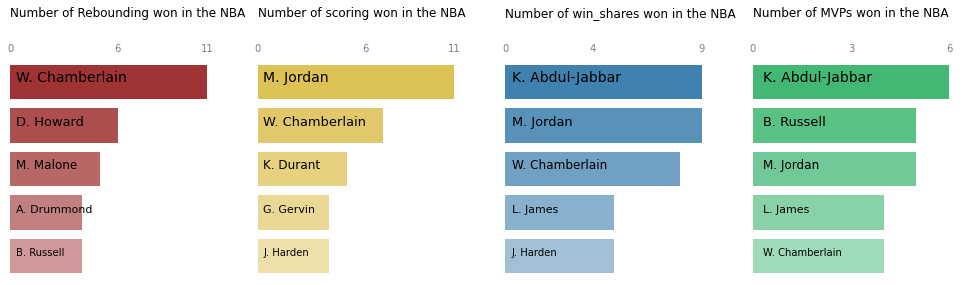

In [56]:
# create a figure for storytelling visualizations
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=4,figsize=[17,4])
axes = [ax1,ax2,ax3,ax4]
for ax, data,color, metric in zip(axes,[rebounds,scoring,win_share,mvp],['#B22222','#F4D03F','#2E86C1','#2ECC71'],['Rebounding','scoring','win_shares','MVPs']):
    ax = sns.barplot(data=data,y='player',x=data.columns[1],color=color,ax=ax)
    for loc in ['right','left','top','bottom']:
        ax.spines[loc].set_visible(False)
    for bar, alpha in zip(ax.containers[0],np.linspace(1,0.5,5)):
        bar.set_alpha(alpha)
    ax.set_xlabel('');
    ax.set_ylabel('');
    ax.set_yticklabels([]);
    ax.xaxis.tick_top()
    ax.tick_params(left=False,top=False)
    ax.tick_params(axis='x',colors='grey')
    ax.set_xticks([0,round(data.iloc[:,1].max()/2),round(data.iloc[:,1].max())]);
    size = 14
    y = 0
    for name in data.iloc[:,0]:
        ax.text(0.3,y,name,size=size);
        y += 1
        size -= 1
    ax.text(0,-1.5,'Number of {} won in the NBA'.format(metric),size=12);